Comparing performance of numpy + openblas with increasing number of threads.  Then doing the same for the Intel Python distribution which uses numpy + mkl + some black magic + openmp

Just doing matrix multiplication here -- $NxN$ where $N = [500,1000,2000]$

In [1]:
!which python

/home/gil/anaconda/bin/python


In [2]:
!python printinfo.py

lapack_opt_info:
    library_dirs = ['/home/gil/anaconda/lib']
    define_macros = [('HAVE_CBLAS', None)]
    language = c
    libraries = ['openblas']
openblas_lapack_info:
    library_dirs = ['/home/gil/anaconda/lib']
    define_macros = [('HAVE_CBLAS', None)]
    language = c
    libraries = ['openblas']
blas_mkl_info:
  NOT AVAILABLE
blas_opt_info:
    library_dirs = ['/home/gil/anaconda/lib']
    define_macros = [('HAVE_CBLAS', None)]
    language = c
    libraries = ['openblas']
openblas_info:
    library_dirs = ['/home/gil/anaconda/lib']
    define_macros = [('HAVE_CBLAS', None)]
    language = c
    libraries = ['openblas']


In [3]:
!/home/gil/intelpython/bin/python3 printinfo.py

mkl_info:
    define_macros = [('SCIPY_MKL_H', None)]
    library_dirs = ['/nfs/fx/proj/openmp/compilers/intel/15.0/Linux/pkgs/update3/composerxe/mkl/lib/intel64']
    libraries = ['mkl_rt', 'pthread']
    include_dirs = ['/nfs/fx/proj/openmp/compilers/intel/15.0/Linux/pkgs/update3/composerxe/mkl/include']
openblas_lapack_info:
  NOT AVAILABLE
lapack_mkl_info:
    define_macros = [('SCIPY_MKL_H', None)]
    library_dirs = ['/nfs/fx/proj/openmp/compilers/intel/15.0/Linux/pkgs/update3/composerxe/mkl/lib/intel64']
    libraries = ['mkl_rt', 'mkl_rt', 'pthread']
    include_dirs = ['/nfs/fx/proj/openmp/compilers/intel/15.0/Linux/pkgs/update3/composerxe/mkl/include']
blas_opt_info:
    define_macros = [('SCIPY_MKL_H', None)]
    library_dirs = ['/nfs/fx/proj/openmp/compilers/intel/15.0/Linux/pkgs/update3/composerxe/mkl/lib/intel64']
    libraries = ['mkl_rt', 'pthread']
    include_dirs = ['/nfs/fx/proj/openmp/compilers/intel/15.0/Linux/pkgs/update3/composerxe/mkl/include']
lapack_opt_info:

In [1]:
import pickle
import numpy
import collections

In [2]:
#open pickled dictionaries
data1 = open('results_openblas.pkl','rb')
data2 = open('results_mkl.pkl','rb')

#load pickled dictionary and change to ordereddict (sorted by insertion order)
#thanks http://stackoverflow.com/a/9001529
results_openblas = pickle.load(data1)
results_openblas = collections.OrderedDict(sorted(results_openblas.items()))
results_mkl = pickle.load(data2)
results_mkl = collections.OrderedDict(sorted(results_mkl.items()))
                          
#close the file objects
data1.close()
data2.close()

In [12]:
oblas = numpy.empty(3, dtype=numpy.ndarray)
mkl = numpy.empty(3, dtype=numpy.ndarray)
for x in [0,1,2]:
    oblas[x] = numpy.array([key for counter in results_openblas.values() for key in counter[x:x+1]])
    mkl[x] = numpy.array([key for counter in results_mkl.values() for key in counter[x:x+1]])

In [16]:
from matplotlib import pyplot
%matplotlib inline

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [18]:
pyplot.legend?

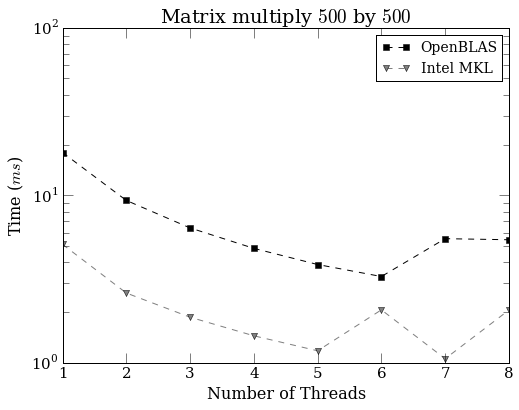

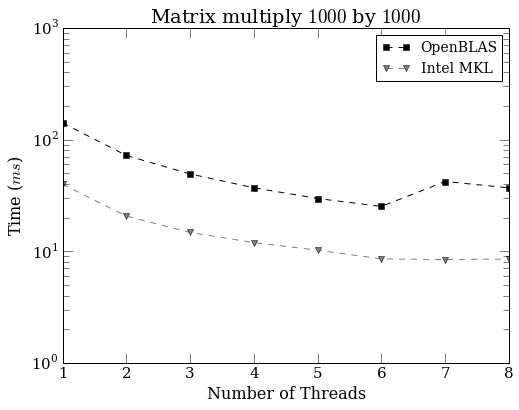

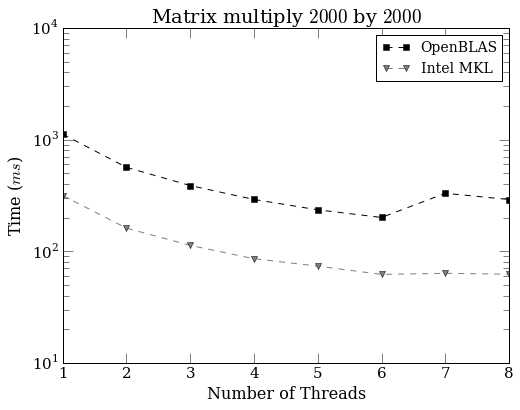

In [20]:
matsizes = [500,1000,2000]

for i, n in enumerate(matsizes):

    fig = pyplot.figure(figsize=(8,6))
    plot = fig.add_subplot(111)
    pyplot.semilogy(numpy.arange(1,9),oblas[i]/1000, color='black', linestyle='dashed', marker='s', label='OpenBLAS')
    pyplot.semilogy(numpy.arange(1,9),mkl[i]/1000, color='grey', linestyle='dashed', marker='v', label='Intel MKL')
    pyplot.xlabel('Number of Threads')
    pyplot.ylabel('Time ($ms$)')
    pyplot.legend(fontsize=14)
    pyplot.title('Matrix multiply ${}$ by ${}$'.format(n,n))
    plot.tick_params(length=10, axis='both', which='major', labelsize=15)
    plot.tick_params(length=6, axis='y', which='minor')
